In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
df1=pd.read_csv("project-updated.csv")
df1.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi
2,2018,91,80,6,260,IIT kanpur
3,2017,88,85,2,222,IIT kharagpur
4,2016,89,84,1,600,IIT guwahati


In [30]:
df=df1.copy()
len(df)

1004

In [31]:
colg=np.unique(df['College'])
print(colg)
print(len(df))
print(len(colg))

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']
1004
38


In [32]:
code=[]
for i in range(len(colg)):
    code.append(i+1)

In [33]:
df['College']=df['College'].replace(colg,code)
bak_college=np.array(df['College'])
df.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11
2,2018,91,80,6,260,18
3,2017,88,85,2,222,19
4,2016,89,84,1,600,13


In [34]:
X = df.drop(columns=["Year","College"])
y=df['College']

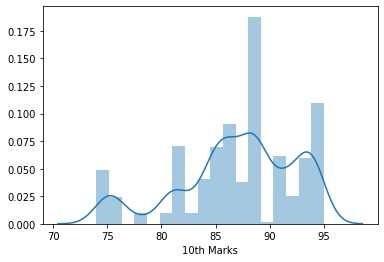

In [35]:
sns.distplot(df['10th Marks'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=22)
clfxg=XGBClassifier(objective="multi:softmax",n_estimators=50,learning_rate=0.0001)
clfxg.fit(X_train,y_train)
predxg=clfxg.predict(X_test)
scrxg=clfxg.score(X_test,y_test)
scrxg=eval("%0.2f"%scrxg)*100
print("Algorithm Score: ",scrxg,"%")

Algorithm Score:  80.0 %


In [37]:
pd.crosstab(y_test, predxg, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,7,10,12,13,14,...,26,27,29,32,33,34,36,37,38,All
True,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,3
12,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=36)
clfdt = DecisionTreeClassifier()
clfdt.fit(X_train,y_train)
preddt=clfdt.predict(X_test)
scrdt=clfdt.score(X_test,y_test)
scrdt=eval("%0.2f"%scrdt)*100
print("Algorithm Score: ",scrdt,"%")

Algorithm Score:  98.0 %


### User input section

In [39]:
df.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11


In [40]:
col=df.columns.tolist()[1:-1]
print(col)

['10th Marks', '12th Marks', '12th Division', 'AIEEE Rank']


In [41]:
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

10th Marks: 78
12th Marks: 79
12th Division: 543
AIEEE Rank: 123


In [42]:
userpreddt=clfdt.predict([usrip])
print("You may have change to get entrance in: ",colg[code.index(userpreddt[0])])

You may have change to get entrance in:  IIT delhi


In [43]:
dct={col[i]:usrip[i]
    for i in range(len(col))}
print(dct)

{'10th Marks': 78, '12th Marks': 79, '12th Division': 543, 'AIEEE Rank': 123}


In [44]:
uip=pd.DataFrame(dct,index=[len(X_test)])
uip.head()

,10th Marks,12th Marks,12th Division,AIEEE Rank
51,78,79,543,123


In [45]:
userpredxg=clfxg.predict(uip)
print("You may have change to get entrance in: ",colg[code.index(userpredxg[0])])

You may have change to get entrance in:  IIT Bombay


### New Column SEction

In [46]:
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi


In [47]:
df1['College Code']=bak_college
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,College Code
0,2019,90,89,3,98,IIT Bombay,9
1,2015,95,92,2,100,IIT delhi,11
